## EDA notebook

In [1]:
import pandas as pd
import numpy as np
import data_cleaning as dc
import feature_engineering as fe

pd.options.display.max_columns = 999
pd.options.display.max_rows = 999

outcomes = pd.read_csv('https://data.austintexas.gov/api/views/9t4d-g238/rows.csv?accessType=DOWNLOAD')
intakes = pd.read_csv('https://data.austintexas.gov/api/views/wter-evkm/rows.csv?accessType=DOWNLOAD')

In [2]:
outcomes = dc.prep_outcomes_file(outcomes)
intakes = dc.prep_intakes_file(intakes)
animal_shelter_df = dc.merge_files(intakes,outcomes)

#### `feature_engineering`

In [3]:
animal_shelter_df = fe.create_species_var(animal_shelter_df)
animal_shelter_df = fe.create_neutered_var(animal_shelter_df)
animal_shelter_df = fe.reduce_breed_list(animal_shelter_df)

In [4]:

import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from matplotlib.ticker import FuncFormatter
import seaborn as sns



# System and Image manipulation packages
import PIL
from PIL import Image
import imgkit

In [5]:
tb_styles = {'selector': 'table',
        'props':[( 'width', '100%')]}

th_styles={'selector': 'th',
           'props': [('border', "1"),
                     ("border-color", "black"),
                     ('border-style','solid'),
                     ('border-width','1px'),
                     ('font-family', 'verdana'),
                     ('white-space', 'nowrap'),
                     ('width', '75%'),
                     ("text-align", "left")]
          }



td_styles = {'selector': 'td',
             'props': [('font-family', 'verdana'),
                       ('border', "1"),
                       ("border-color", "black"),
                       ('border-style','solid'),
                       ('border-width','1px'),
                       ('white-space', 'nowrap'),
                       ('padding-right',"10px"),
                      ('padding',"10px")]
            }

cap_style = {'selector':'caption',
            'props':[('font-family', 'verdana'),
                     ('white-space', 'nowrap'),
                    ("font-size", "large")]}

In [8]:
test_df =animal_shelter_df.animal_type.value_counts().to_frame()
test_df.columns = ["count"]

improved =test_df.style.set_table_attributes('style="border-collapse:collapse"')\
                 .set_table_styles([tb_styles, th_styles,td_styles,cap_style]).set_caption("sample caption")
html = improved.render()
path = '../images/test.png'
print(path)
imgkit.from_string(html, path)

../images/test.png
Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               


True

In [14]:
im = Image.open("../images/test.png")

width, height = im.size 
new_width = width/3
box = (0, 0, new_width, height)
cropped_image = im.crop(box)
cropped_image.show()
cropped_image.save('../images/test.png')

In [ ]:
#viz.value_counts_table(animal_shelter_df.animal_type.value_counts(), "Count of Animal Type at Intake", "animal_type_i")    
#viz.value_counts_table(animal_shelter_df[animal_shelter_df.animal_type == "Other"].breed.value_counts()[:10], "Short subset of breeds in Other Animal_type", "breeds_i")

### Start summary tables and analysis (yes, visualizations are not great yet)
### really raw EDA

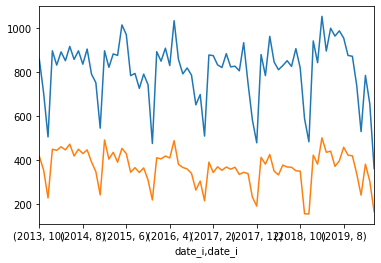

In [248]:
test.loc[(test['species']=="Dog")].groupby([test.date_i.dt.year, test.date_i.dt.month])["animal_id"].count().plot()
test.loc[(test['species']=="Dog") & (test['neutered']==1)].groupby([test.date_i.dt.year, test.date_i.dt.month])["animal_id"].count().plot()


In [217]:
test.neutered.value_counts()

0    57780
1    45073
Name: neutered, dtype: int64

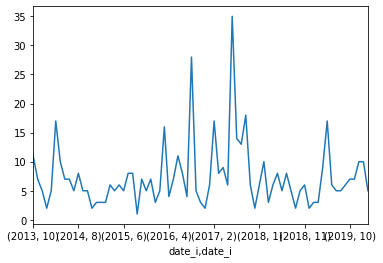

In [224]:
### Data Summary
test.loc[test['species']=="Rabbit"].groupby([test.date_i.dt.year, test.date_i.dt.month])["animal_id"].count().plot()


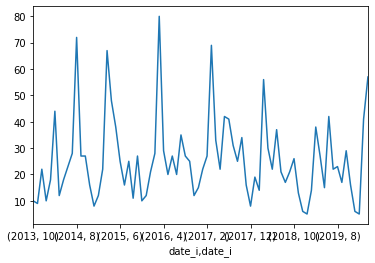

In [225]:
test.loc[test['species']=="Wildlife"].groupby([test.date_i.dt.year, test.date_i.dt.month])["animal_id"].count().plot()

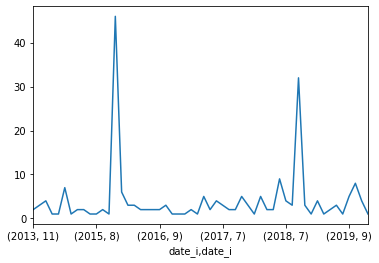

In [226]:
test.loc[test['species']=="Chicken"].groupby([test.date_i.dt.year, test.date_i.dt.month])["animal_id"].count().plot()

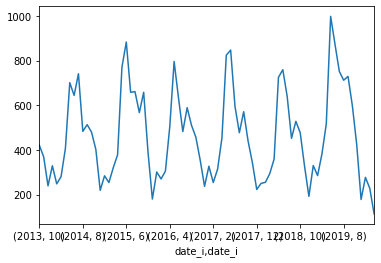

In [227]:
test.loc[test['species']=="Cat"].groupby([test.date_i.dt.year, test.date_i.dt.month])["animal_id"].count().plot()

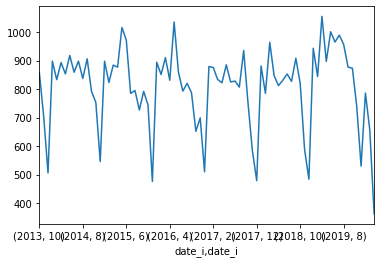

In [228]:
test.loc[test['species']=="Dog"].groupby([test.date_i.dt.year, test.date_i.dt.month])["animal_id"].count().plot()

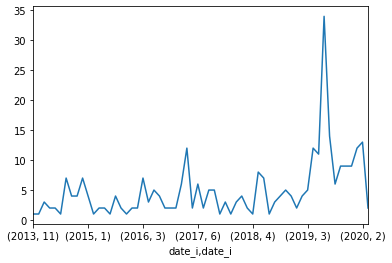

In [229]:
test.loc[test['species']=="Guinea Pig"].groupby([test.date_i.dt.year, test.date_i.dt.month])["animal_id"].count().plot()

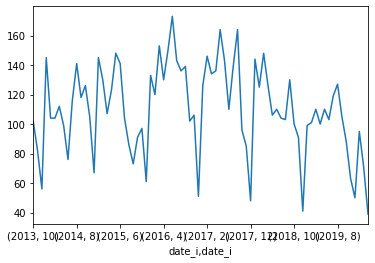

In [244]:
test.loc[test['breed']=="Pit Bull"].groupby([test.date_i.dt.year, test.date_i.dt.month])["animal_id"].count().plot()

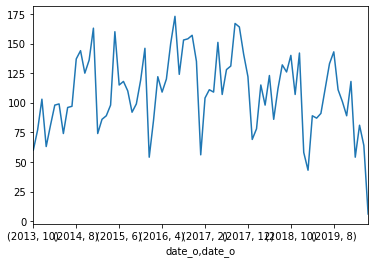

In [245]:
test.loc[test['breed']=="Pit Bull"].groupby([test.date_o.dt.year, test.date_o.dt.month])["animal_id"].count().plot()